# Missing Data

In this notebook, we explore some of the ways that we might choose to work with those situations where data is missing from our data sets. Here, we're exploring a ["food preferences" dataset](https://openmv.net/info/food-consumption), that doesn't have much of a background on its website. 

It's worth noting that if this were a notebook whose primary purpose was exploring this particular data set, it would be on us at this time to do some more work into researching the origins of this data set and how it came into existence.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression

from os import path
datapath = path.join('..', 'data', 'food-consumption.csv')
df = pd.read_csv(datapath)

df.head()

,Country,Real coffee,Instant coffee,Tea,Sweetener,Biscuits,Powder soup,Tin soup,Potatoes,Frozen fish,...,Apples,Oranges,Tinned fruit,Jam,Garlic,Butter,Margarine,Olive oil,Yoghurt,Crisp bread
0,Germany,90,49,88,19.0,57.0,51,19,21,27,...,81,75,44,71,22,91,85,74,30.0,26
1,Italy,82,10,60,2.0,55.0,41,3,2,4,...,67,71,9,46,80,66,24,94,5.0,18
2,France,88,42,63,4.0,76.0,53,11,23,11,...,87,84,40,45,88,94,47,36,57.0,3
3,Holland,96,62,98,32.0,62.0,67,43,7,14,...,83,89,61,81,15,31,97,13,53.0,15
4,Belgium,94,38,48,11.0,74.0,37,23,9,13,...,76,76,42,57,29,84,80,83,20.0,5


## Finding missing data

First, we can use some tools to find which data is missing.

In [2]:
# Which columns have any "NaN" entries?
df.columns[df.isna().any()]

Index(['Sweetener', 'Biscuits', 'Yoghurt'], dtype='object')

So, there are three columns with missing values. Let's take a look at those rows as well that have missing data. Do the same observations have missing "Yoghurt" and "Biscuits", for example? Or are the different missing values occuring in different missing rows?

In [3]:
# Show those rows that have missing data:
df[df.isna().any(axis=1)]

,Country,Real coffee,Instant coffee,Tea,Sweetener,Biscuits,Powder soup,Tin soup,Potatoes,Frozen fish,...,Apples,Oranges,Tinned fruit,Jam,Garlic,Butter,Margarine,Olive oil,Yoghurt,Crisp bread
10,Sweden,97,13,93,31.0,NaN,43,43,39,54,...,56,78,53,75,9,68,32,48,2.0,93
13,Finland,98,12,84,20.0,64.0,27,10,8,18,...,50,57,22,37,15,96,94,17,NaN,64
14,Spain,70,40,40,NaN,62.0,43,2,14,23,...,59,77,30,38,86,44,51,91,16.0,13


We can see two of the NaN values here, but we cannot see the third. Here are two things we could do: we could use a command like `pd.set_option("display.max_rows", None)` to make jupyter display all the columns, but that could get cumbersome. Instead, I'll vertically _and_ horizontally slice to ensure that I have a tractable output. Here, we're using `df.loc` which allows for numpy-like slicing in both the vertical and horizontal directions at once.

In [4]:
#          horizontal             vertical
#              |                      |
#              V                      V

df.loc[df.isna().any(axis=1), df.isna().any()]

,Sweetener,Biscuits,Yoghurt
10,31.0,NaN,2.0
13,20.0,64.0,NaN
14,NaN,62.0,16.0


So, this turns out to be an extremely tame data set in terms of its missing data. Often, there is a larger number of missing entries. We also need to be sure that there isn't missing data that's hiding as another value, such as `0` or `-1`. The best way to do this would be via a few plots and a call to `describe` to look for strange values.

In [5]:
df.describe()

,Real coffee,Instant coffee,Tea,Sweetener,Biscuits,Powder soup,Tin soup,Potatoes,Frozen fish,Frozen veggies,Apples,Oranges,Tinned fruit,Jam,Garlic,Butter,Margarine,Olive oil,Yoghurt,Crisp bread
count,16.000000,16.000000,16.000000,15.000000,15.000000,16.000000,16.000000,16.000000,16.000000,16.00000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,16.000000
mean,78.562500,39.250000,78.500000,18.000000,60.666667,49.000000,18.312500,12.750000,21.875000,15.87500,66.812500,70.500000,41.937500,55.187500,42.312500,75.812500,69.125000,54.187500,20.533333,27.750000
std,23.145824,23.147354,18.540047,10.902162,19.841035,15.427249,20.178268,9.574271,13.980343,12.78997,17.581122,14.033294,23.256451,22.592679,34.677022,20.910026,26.849891,28.842604,18.980692,25.026652
min,27.000000,10.000000,40.000000,2.000000,22.000000,27.000000,1.000000,2.000000,4.000000,2.00000,22.000000,42.000000,8.000000,16.000000,5.000000,31.000000,24.000000,13.000000,2.000000,3.000000
25%,71.500000,17.000000,62.500000,11.000000,56.000000,36.250000,3.750000,6.500000,13.750000,6.50000,56.750000,65.250000,28.000000,40.250000,11.000000,64.500000,47.750000,29.500000,5.500000,10.500000
50%,89.000000,39.000000,84.500000,19.000000,62.000000,47.000000,11.500000,10.000000,19.500000,13.00000,71.500000,72.000000,43.000000,54.000000,25.500000,83.000000,79.000000,52.500000,13.000000,21.000000
75%,96.000000,54.250000,92.250000,26.500000,75.000000,58.000000,20.000000,17.000000,26.250000,21.50000,81.000000,77.250000,50.750000,72.000000,81.500000,94.000000,94.000000,83.250000,30.500000,31.000000
max,98.000000,86.000000,99.000000,35.000000,91.000000,75.000000,76.000000,39.000000,54.000000,45.00000,87.000000,94.000000,89.000000,91.000000,91.000000,97.000000,97.000000,94.000000,57.000000,93.000000


What I'm seeing here is none of the `min` or `max` values giving me weird values. So, I think our entries that are numbers are probably good. Let's plot some histograms as well to see if the distributions look good. In theory, we should check them all, but as an example, and to keep this notebook a little shorter, I'll just show three.

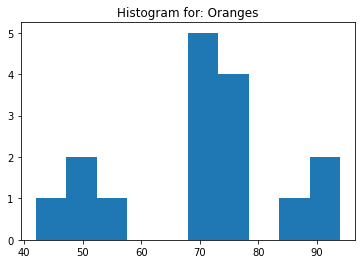

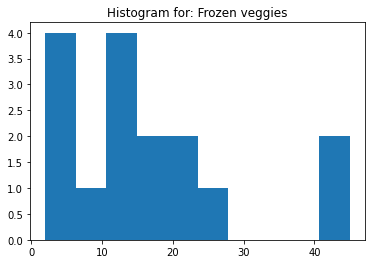

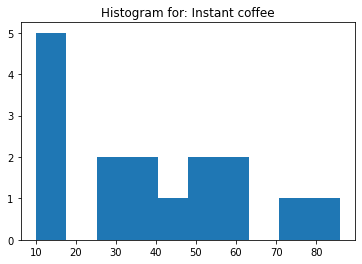

In [6]:
"""
Uncomment this to see them all

for column in df.columns:
    plt.hist(df[column])
    plt.show()
"""

for column in ["Oranges", "Frozen veggies", "Instant coffee"]:
    plt.hist(df[column])
    plt.title("Histogram for: {}".format(column))
    plt.show()

I chose these three as examples because the first one, `Oranges`, is suggestive of a graph with no numbers-as-missing-data. It looks fine. The `Frozen veggies` and `Instant coffee` columns _might_ have some issues: the very high values of `Frozen veggies` and the very low values of `Instant coffee` seem a little bit disconnected from the group. Let's investigate further.

In [7]:
# What are the values of Instant coffee that are small?
print(df["Real coffee"].describe())

df.loc[df["Instant coffee"] < 20, ["Country", "Instant coffee", "Real coffee"]]

count    16.000000
mean     78.562500
std      23.145824
min      27.000000
25%      71.500000
50%      89.000000
75%      96.000000
max      98.000000
Name: Real coffee, dtype: float64


,Country,Instant coffee,Real coffee
1,Italy,10,82
10,Sweden,13,97
11,Denmark,17,96
12,Norway,17,92
13,Finland,12,98


What this is suggesting is that these values are probably legitimate, as they're not all the same value. Perhaps these countries care a bit more about the quality of their coffee? I added `Real coffee`, as well as that column's _description_, or basic statistics like min and max, as well, to justify this argument. How about `Frozen veggies`?

In [8]:
df.loc[df["Frozen veggies"] > 40, ["Country", "Frozen veggies"]]

,Country,Frozen veggies
10,Sweden,45
11,Denmark,42


Hm, interesting. I wonder if it's an issue of transportation for fresh veggies? Or, maybe this is part of their culture? Whatever the reason, these seem like legitimate values as well. 

Just as an example, let's temporarily rig the dataset so that you could see what it _would_ look like if there was some missing data tagged as some strange number.

In [9]:
# Let's duplicate the final row a bunch of times and add some garbage in:
bogus = pd.DataFrame([df.iloc[-1]] * 6)
bogus["Oranges"] = -1  # Suppose `-1` meant "missing"
bogus

dirtied_data = pd.concat([df, bogus], axis=0)
for frame in [df, dirtied_data]:
    print("Shape of dataframe: {}".format(frame.shape)) 

Shape of dataframe: (16, 21)
Shape of dataframe: (22, 21)


Okay, and now to see what that might look like:

(array([6., 0., 0., 0., 1., 2., 1., 5., 5., 2.]),
 array([-1. ,  8.5, 18. , 27.5, 37. , 46.5, 56. , 65.5, 75. , 84.5, 94. ]),
 <BarContainer object of 10 artists>)

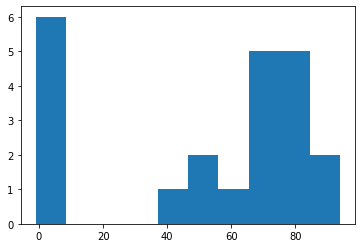

In [10]:
plt.hist(dirtied_data["Oranges"])

See how that looks a bit like the `Instant Coffee` example? Only this time, if we were to explore more, we would see that all those low values are the same, and they're not likely to be legitimate values, given that we're supposed to be counting oranges.

In [11]:
dirtied_data.loc[dirtied_data["Oranges"] < 20, "Oranges"]

15   -1
15   -1
15   -1
15   -1
15   -1
15   -1
Name: Oranges, dtype: int64

That's clearly bogus.

## What do do with missing data?

Now that we have an understanding of what we think are the missing entries in the dataset, we have to decide what to do with them. 

#### Dropping rows or columns
The first option is dropping the rows or columns that have missing data. This is often the best bet if:
* You have plenty of data to work with, or 
* Those rows or columns are full of missing entries, making them significantly less useful that the rest of the data set.

This is also the easiest technique. Let's suppose we wanted to do that with one of the missing entries, `Sweden`'s `Biscuits` column. 

In [12]:
# Just confirming:
df.loc[10, "Biscuits"]

nan

In [13]:
# You could drop the row:
without_sweden = df.drop(10, axis = 0)

# or the column:
without_biscuits = df.drop("Biscuits", axis=1)

for frame in [without_sweden, without_biscuits]:
    print("Shape of dataframe: {}".format(frame.shape)) 

df = without_biscuits

Shape of dataframe: (15, 21)
Shape of dataframe: (16, 20)


#### Imputing with the mean or median

Another simple options is called _imputing_, or replacing the missing value with that column's median or mean. Which to do is a topic of much discussion — often the median is a better choice because it is an actual value from the dataset, but it isn't always the right choice.

Let's replace `Finland`'s missing `Yoghurt` column with `Yoghurt`'s median.

In [14]:
print("The median of `Yoghurt` is: {}".format(df["Yoghurt"].median()))

df.loc[13, "Yoghurt"] = df["Yoghurt"].median()

# Just confirming (also, using boolean indexing for the rows, just to see it):
df.loc[df["Country"] == "Finland", ["Country", "Yoghurt"]]

The median of `Yoghurt` is: 13.0


,Country,Yoghurt
13,Finland,13.0


You could even go really crazy and determine a subset of the data that is similar to your row in some way (say, for us, only Scandinavian countries), and only take the mean of those (since there are only four such countries, I think perhaps the mean makes more sense than the median).

In [15]:
# Returning to the original value:
df.loc[13, "Yoghurt"] = np.NaN

# might be making an international enemy for myself with this next line:
scandinavia = pd.Series(["Sweden", "Denmark", "Norway", "Finland"])

mean = df.loc[df["Country"].isin(scandinavia), "Yoghurt"].mean()
df.loc[13, "Yoghurt"] = mean

df.loc[df["Country"].isin(scandinavia), ["Country", "Yoghurt"]]

,Country,Yoghurt
10,Sweden,2.0
11,Denmark,11.0
12,Norway,2.0
13,Finland,5.0


You could also do some exploration at first to determine the best subset of your data to use to compute the median or mean. You could, for example, use clustering to determine a cluster that's like your row of missing data, and then impute using only that cluster.

#### Fancier Tricks

There are lots of other things that you can do to fill missing values. One example would be finding another column that's correlated to your column with missing data, and fit a linear model to predict the missing column's data. For example, let's do this for `Spain`'s missing `Sweetener` entry.

In [16]:
# First, what's a similar column to Sweetener?

correlations = []

for column in df.columns.drop(["Sweetener","Country"]):
    correlations.append((column, abs(df[column].corr(df["Sweetener"]))))
    
correlations.sort(key=lambda x: -x[1])
print(*correlations, sep="\n")

('Frozen veggies', 0.8097661991056496)
('Frozen fish', 0.6530179911342388)
('Tinned fruit', 0.639898119709343)
('Tea', 0.6359180660019883)
('Garlic', 0.46782012410721124)
('Tin soup', 0.4674019970608857)
('Crisp bread', 0.4604640860739981)
('Apples', 0.4097135595970035)
('Oranges', 0.39316292948544146)
('Jam', 0.3750926540723653)
('Olive oil', 0.36945262524942885)
('Margarine', 0.3678719617974007)
('Potatoes', 0.3142164864018697)
('Real coffee', 0.25364736159650947)
('Instant coffee', 0.24201140737222498)
('Powder soup', 0.2058439611316546)
('Yoghurt', 0.16940134788283212)
('Butter', 0.029144593557602464)


Wild. `Frozen veggies` is the most highly correlated with `Sweetener`. I suppose I don't know what I would have guessed, but it wasn't that. At any rate, let's take a look:

Text(0.5, 0, 'Frozen veggies')

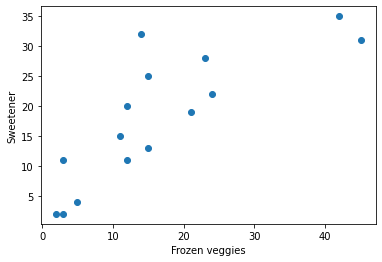

In [17]:
plt.scatter(df["Frozen veggies"], df["Sweetener"])
plt.ylabel("Sweetener")
plt.xlabel("Frozen veggies")

Okay, that looks like a pretty decent correlation. Let's impute by fitting a linear regression to these, using `Frozen veggies` to predict `Sweetener`.

14    7
Name: Frozen veggies, dtype: int64


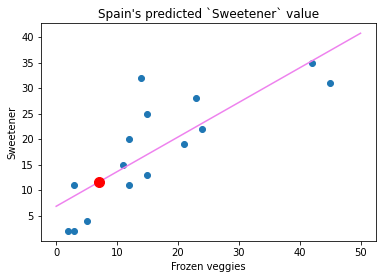

In [18]:
df_for_fitting = df.dropna()

model = LinearRegression().fit(df_for_fitting[["Frozen veggies"]], df_for_fitting["Sweetener"])

m = model.coef_[0]
b = model.intercept_

plt.scatter(df["Frozen veggies"], df["Sweetener"])
plt.ylabel("Sweetener")
plt.xlabel("Frozen veggies")
plt.title("Spain's predicted `Sweetener` value")

plt.plot([0, 50],[b, m * 50 + b], color="violet", zorder=1)

spains_veggies = df.loc[df["Country"] == "Spain", "Frozen veggies"]
print(spains_veggies)
spains_predicted_sweetener = model.predict(spains_veggies.to_numpy().reshape(-1, 1))

plt.scatter([spains_veggies], spains_predicted_sweetener, color="red", s=100, zorder=2)

Thus, we now have a prediction for the value, so we can put it into our dataset.

In [19]:
df.loc[14, "Sweetener"] = spains_predicted_sweetener[0]

And to conclude, we'll take a look at our dataset to see that it has no more missing values.

In [20]:
"""
The first `.any()` squishes down to the columns by name, as in 
    "Do any elements in this column have a value of NaN?"
    
The second `.any()` squishes that one vector of columns and falses/trues 
    into a single entry, making the final question, 
    "Are there any NaN's in the whole dataset?"

"""
# 
df.isna().any().any() 

False